In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

import datetime
import math
import time

#from pandas.tseries.offsets import *
#from operator import *
from sklearn.cross_validation import train_test_split
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.cross_validation import TimeSeriesSplit

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df_store = pd.read_csv("store.csv")
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

/opt/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_train['Date']=pd.to_datetime(df_train['Date'])
df_train['Year']= df_train['Date'].dt.year
df_train['Month']= df_train['Date'].dt.month
df_train['Day']= df_train['Date'].dt.day
df_train['WeekOfYear'] = df_train.Date.dt.weekofyear
df_train['DateInt']=pd.to_datetime(df_train['Date']).astype(np.int64)

In [6]:
data = df_train[(df_train['Open']!=0)]

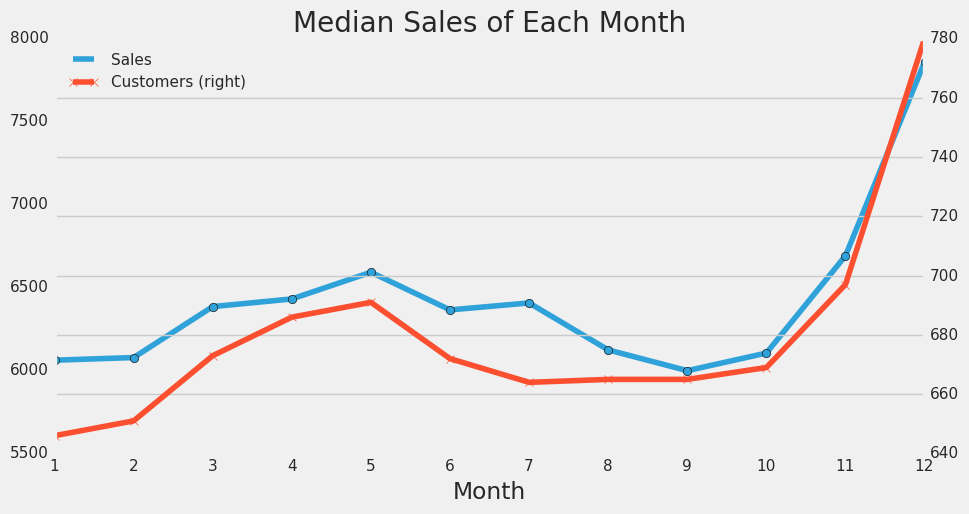

In [26]:
#sns.set()
sales_Month = data.groupby('Month')['Sales'].median()
customer_Month = data.groupby('Month')['Customers'].median()

fig, (axis1) = plt.subplots(1,1, sharex=True, figsize=(10,5))
# plot median sales
ax1 = sales_Month.plot(legend=True, ax=axis1, marker='o',title="Median Sales of Each Month")
ax1.set_xticks(sales_Month.index)
tmp = ax1.set_xticklabels(sales_Month.index.tolist(), rotation=90)
# overlay customer data
customer_Month.plot(legend=True, ax=axis1, marker='x', secondary_y=True)

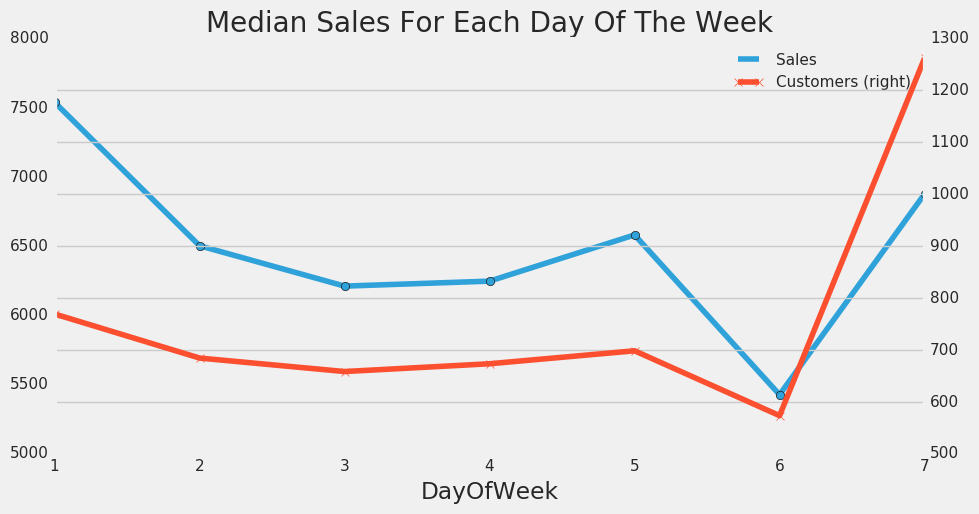

In [25]:
#a better way to get more details, timeline view of medians of each day of the week-

sales_day = data.groupby('DayOfWeek')['Sales'].median()
cust_day = data.groupby('DayOfWeek')['Customers'].median()
#
fig, (axis1) = plt.subplots(1,1, sharex=True, figsize=(10,5))
# plot median sales
ax1 = sales_day.plot(legend=True, ax=axis1, marker='o',title="Median Sales For Each Day Of The Week")
ax1.set_xticks(sales_day.index)
tmp = ax1.set_xticklabels(sales_day.index.tolist(), rotation=90)
# overlay customer data
cust_day.plot(legend=True, ax=axis1, marker='x', secondary_y=True)

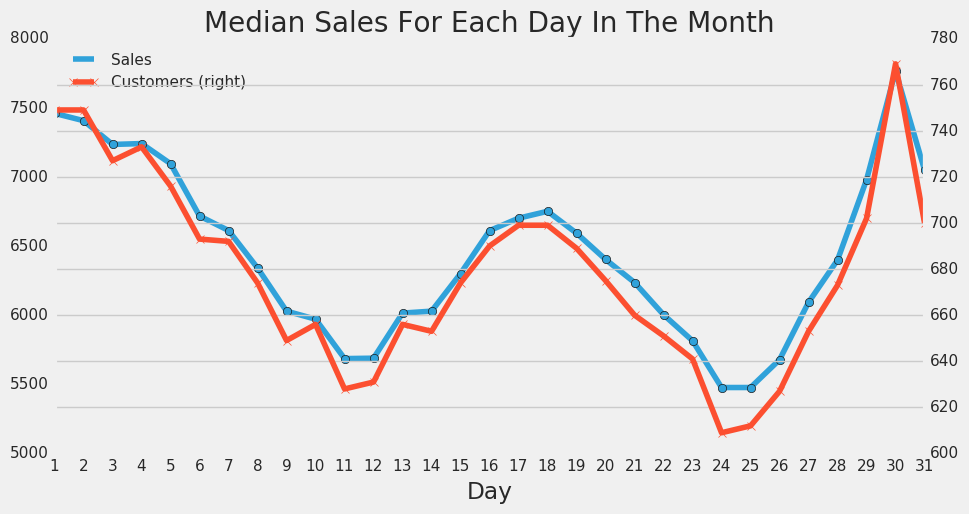

In [24]:
#a better way to get more details, timeline view of medians of each day of the week-

sales_day = data.groupby('Day')['Sales'].median()
cust_day = data.groupby('Day')['Customers'].median()
#
fig, (axis1) = plt.subplots(1,1, sharex=True, figsize=(10,5))
# plot median sales
ax1 = sales_day.plot(legend=True, ax=axis1, marker='o',title="Median Sales For Each Day In The Month")
ax1.set_xticks(sales_day.index)
tmp = ax1.set_xticklabels(sales_day.index.tolist(), rotation=90)
# overlay customer data
cust_day.plot(legend=True, ax=axis1, marker='x', secondary_y=True)

In [28]:
df = pd.merge(df_train, df_store, how='left', on='Store')
df =df[(df['Open']!=0)]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 23 columns):
Store                        844392 non-null int64
DayOfWeek                    844392 non-null int64
Date                         844392 non-null datetime64[ns]
Sales                        844392 non-null int64
Customers                    844392 non-null int64
Open                         844392 non-null int64
Promo                        844392 non-null int64
StateHoliday                 844392 non-null object
SchoolHoliday                844392 non-null int64
Year                         844392 non-null int64
Month                        844392 non-null int64
Day                          844392 non-null int64
WeekOfYear                   844392 non-null int64
DateInt                      844392 non-null int64
StoreType                    844392 non-null object
Assortment                   844392 non-null object
CompetitionDistance          842206 non-null float64
Competi

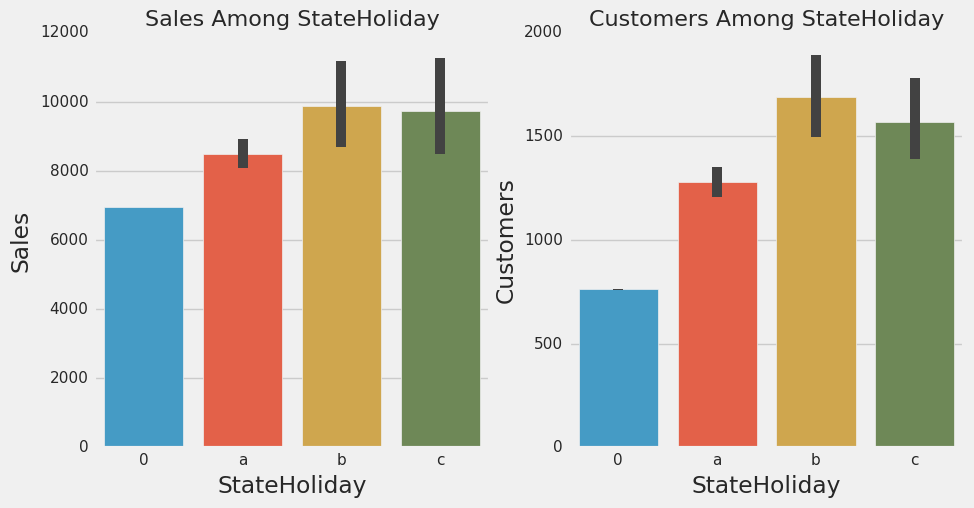

In [79]:
#sales_promo = df.groupby('Promo2')['Sales'].mean()
#cust_promo = df.groupby('Promo2')['Customers'].mean()

df['StateHoliday']=df['StateHoliday'].apply(lambda x:str(x))
fig, (ax1,ax2) = plt.subplots(1,2, sharex=True, figsize=(10,5))
# plot median sales
sns.barplot(x='StateHoliday', y='Sales', data=df, ax=ax1)
ax1.set_title("Sales Among StateHoliday",fontdict={'fontsize':16})
sns.barplot(x='StateHoliday', y='Customers', data=df, ax=ax2)
ax2.set_title("Customers Among StateHoliday",fontdict={'fontsize':16})

#ax1.set_xticks(sales_day.index)
#tmp = ax1.set_xticklabels(sales_day.index.tolist(), rotation=90)
# overlay customer data
#cust_day.plot(legend=True, ax=axis1, marker='x', secondary_y=True)

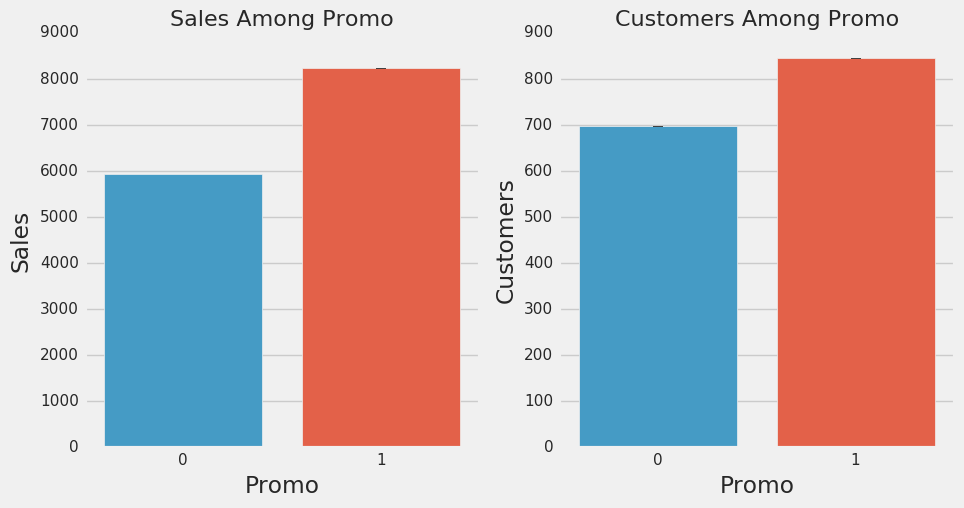

In [84]:
#df['StateHoliday']=df['StateHoliday'].apply(lambda x:str(x))
fig, (ax1,ax2) = plt.subplots(1,2, sharex=True, figsize=(10,5))
# plot median sales
sns.barplot(x='Promo', y='Sales', data=df, ax=ax1)
ax1.set_title("Sales Among Promo",fontdict={'fontsize':16})
sns.barplot(x='Promo', y='Customers', data=df, ax=ax2)
ax2.set_title("Customers Among Promo",fontdict={'fontsize':16})

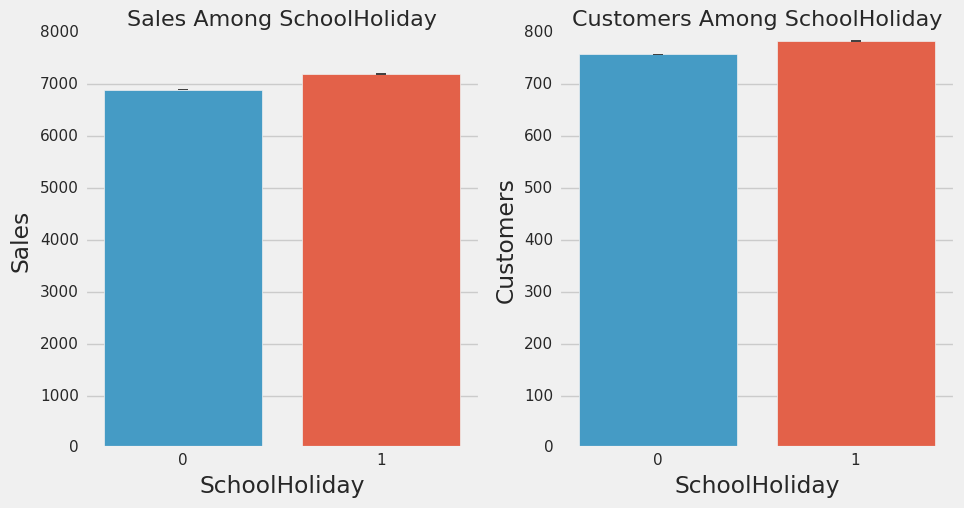

In [81]:
#df['StateHoliday']=df['StateHoliday'].apply(lambda x:str(x))
fig, (ax1,ax2) = plt.subplots(1,2, sharex=True, figsize=(10,5))
# plot median sales
sns.barplot(x='SchoolHoliday', y='Sales', data=df, ax=ax1)
ax1.set_title("Sales Among SchoolHoliday",fontdict={'fontsize':16})
sns.barplot(x='SchoolHoliday', y='Customers', data=df, ax=ax2)
ax2.set_title("Customers Among SchoolHoliday",fontdict={'fontsize':16})

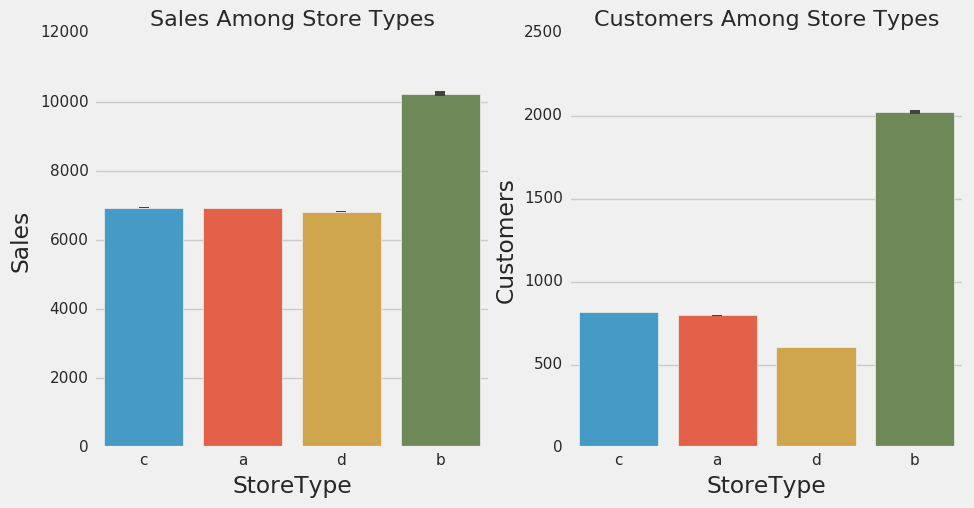

In [77]:
#df['StateHoliday']=df['StateHoliday'].apply(lambda x:str(x))
fig, (ax1,ax2) = plt.subplots(1,2, sharex=True, figsize=(10,5))
# plot median sales
sns.barplot(x='StoreType', y='Sales', data=df, ax=ax1)
ax1.set_title("Sales Among Store Types",fontdict={'fontsize':16})
sns.barplot(x='StoreType', y='Customers', data=df, ax=ax2)
ax2.set_title("Customers Among Store Types",fontdict={'fontsize':16})


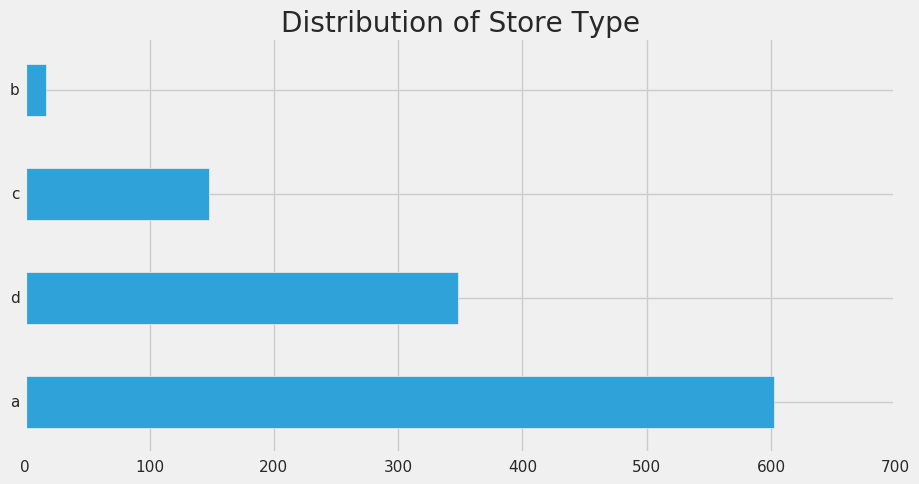

In [70]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
df_store['StoreType'].value_counts().plot.barh()
plt.title("Distribution of Store Type")

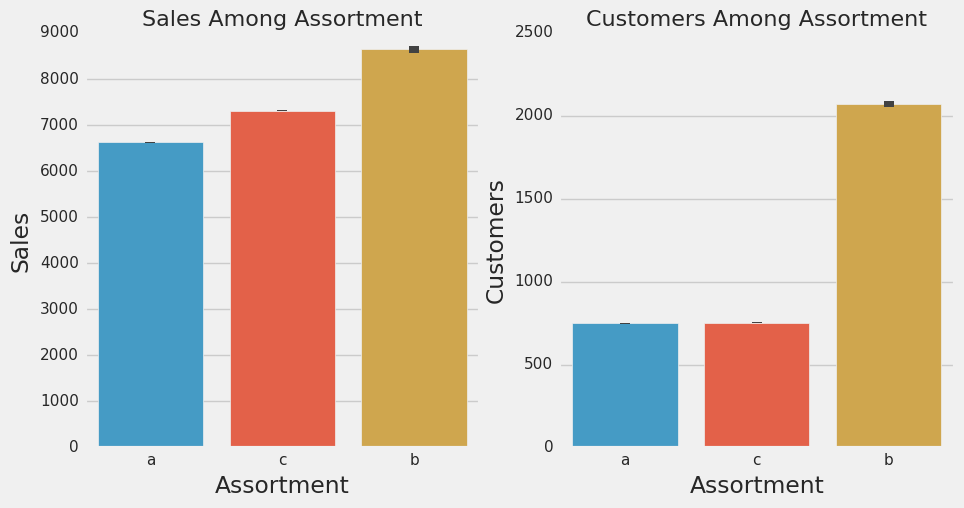

In [82]:
#df['StateHoliday']=df['StateHoliday'].apply(lambda x:str(x))
fig, (ax1,ax2) = plt.subplots(1,2, sharex=True, figsize=(10,5))
# plot median sales
sns.barplot(x='Assortment', y='Sales', data=df, ax=ax1)
ax1.set_title("Sales Among Assortment",fontdict={'fontsize':16})
sns.barplot(x='Assortment', y='Customers', data=df, ax=ax2)
ax2.set_title("Customers Among Assortment",fontdict={'fontsize':16})

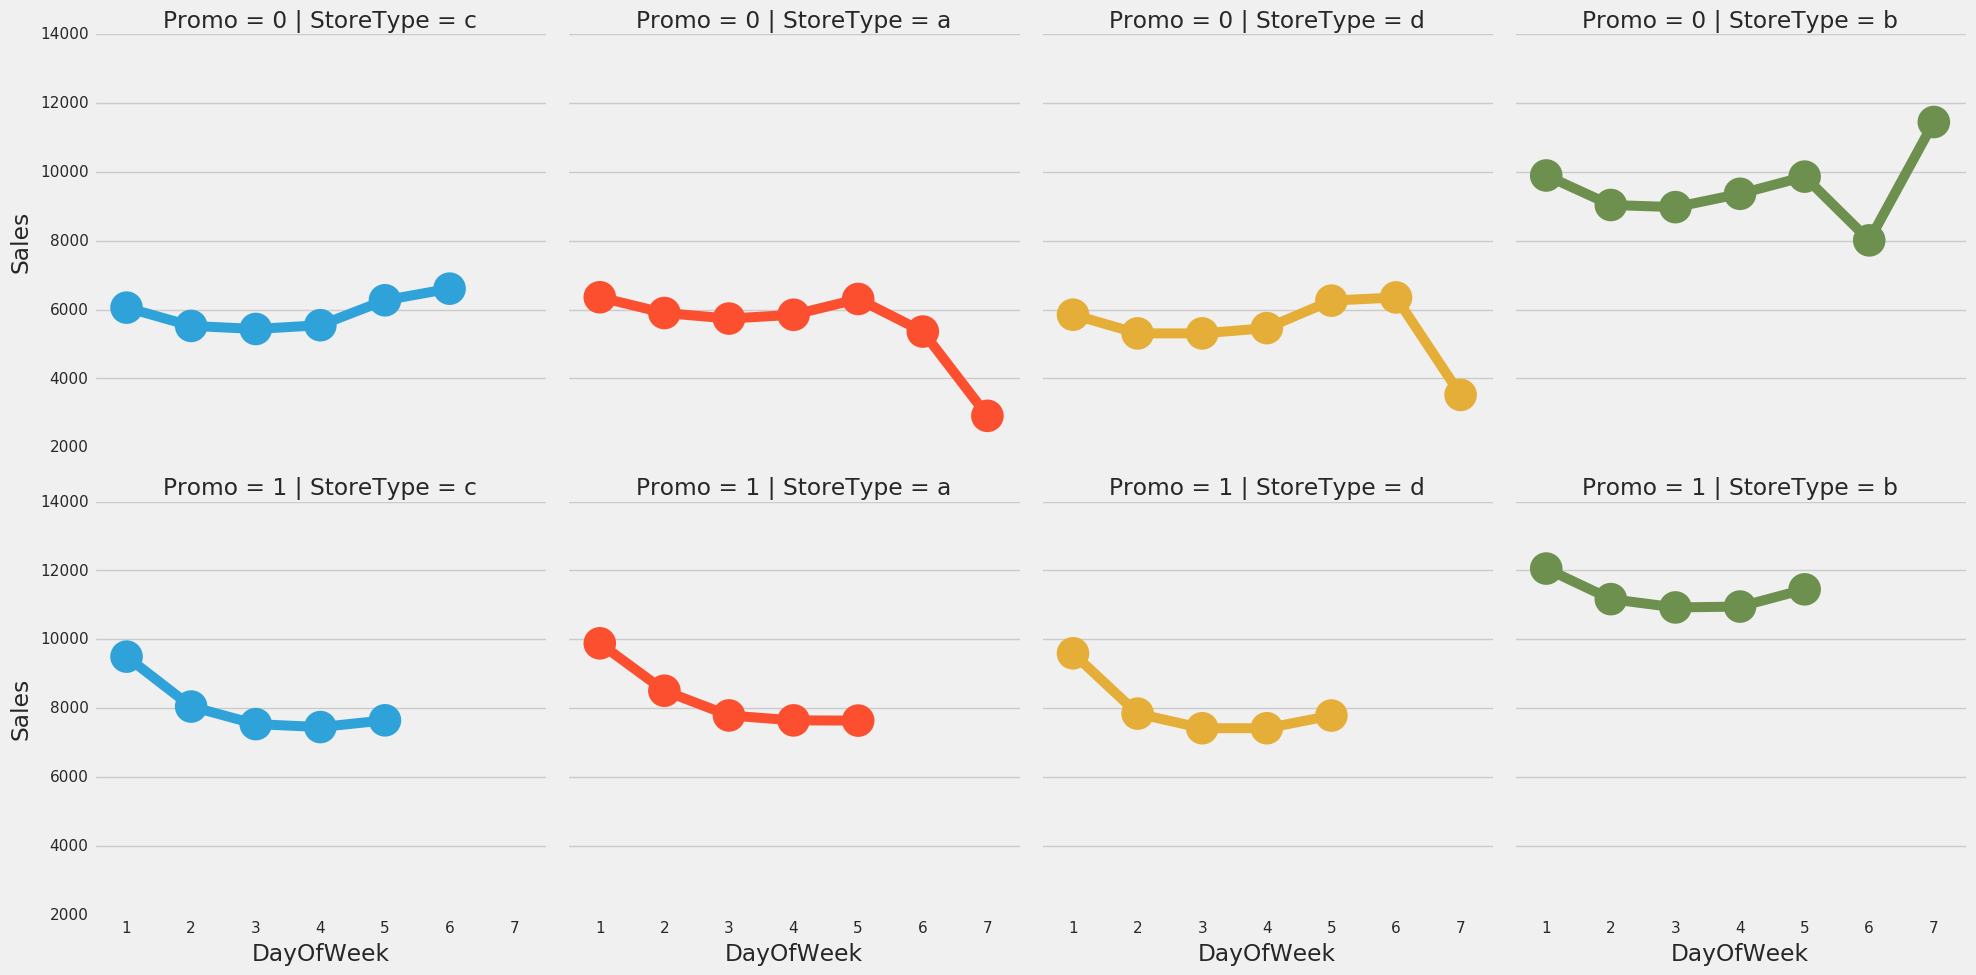

In [85]:
sns.catplot(data = df, x = 'DayOfWeek', y = "Sales", 
               col = 'StoreType', # per store type in cols
               hue = 'StoreType',
               row = 'Promo',
               kind="point")
#plt.title('Sales trend Among Storetype and Promo for each weekday')

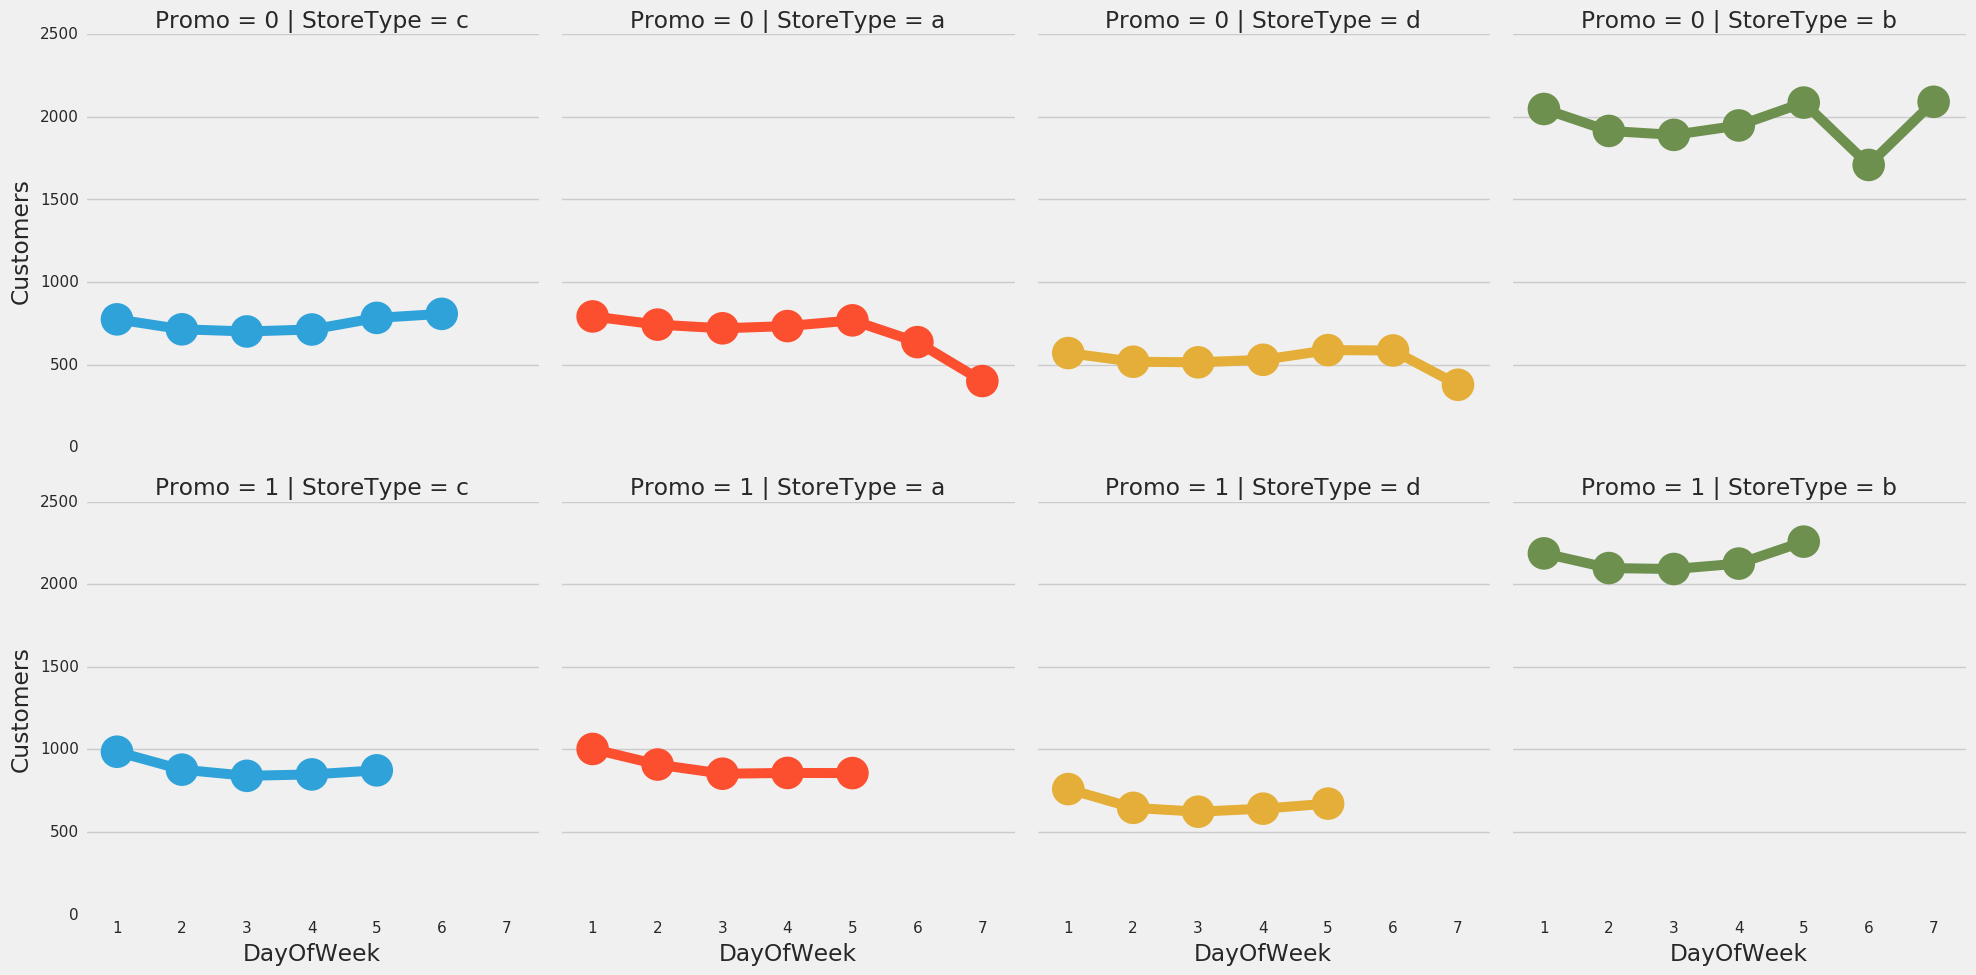

In [56]:
sns.catplot(data = df, x = 'DayOfWeek', y = "Customers", 
               col = 'StoreType', # per store type in cols
               hue = 'StoreType',
               row = 'Promo',
               kind="point")
plt.title()

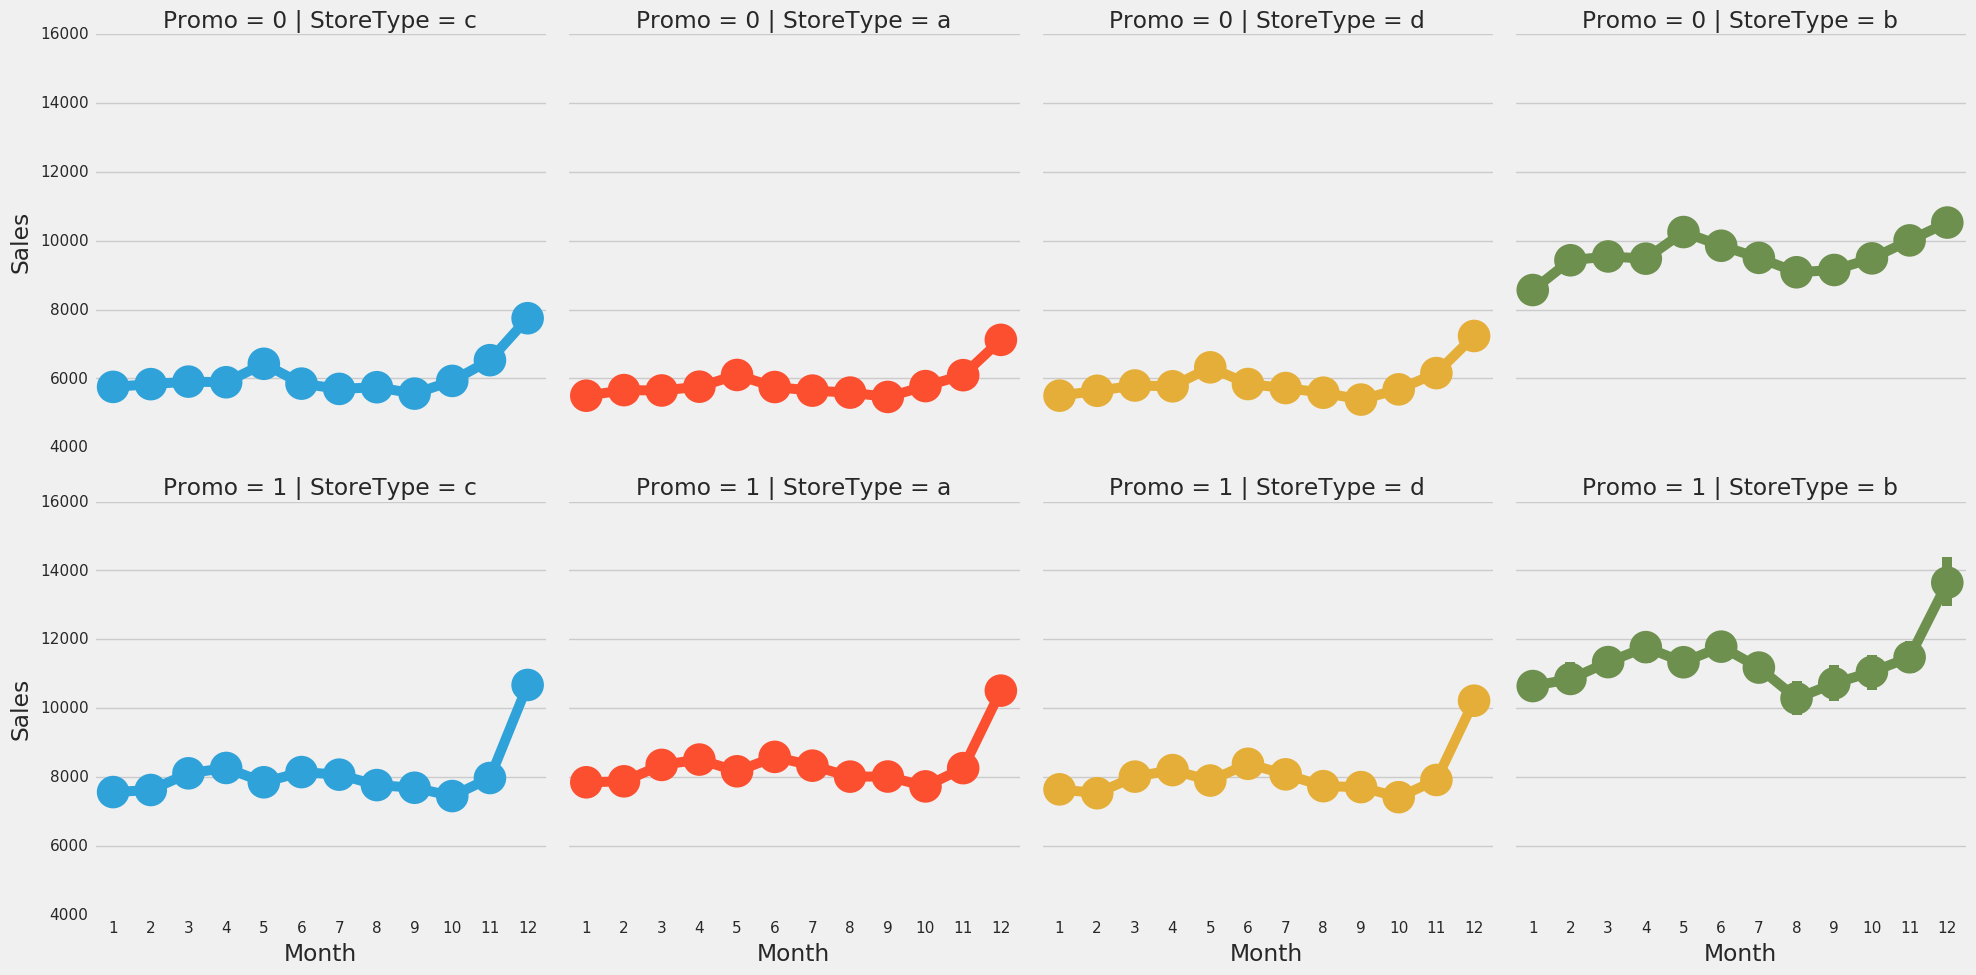

In [58]:
sns.catplot(data = df, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               hue = 'StoreType',
               row = 'Promo',
               kind="point")

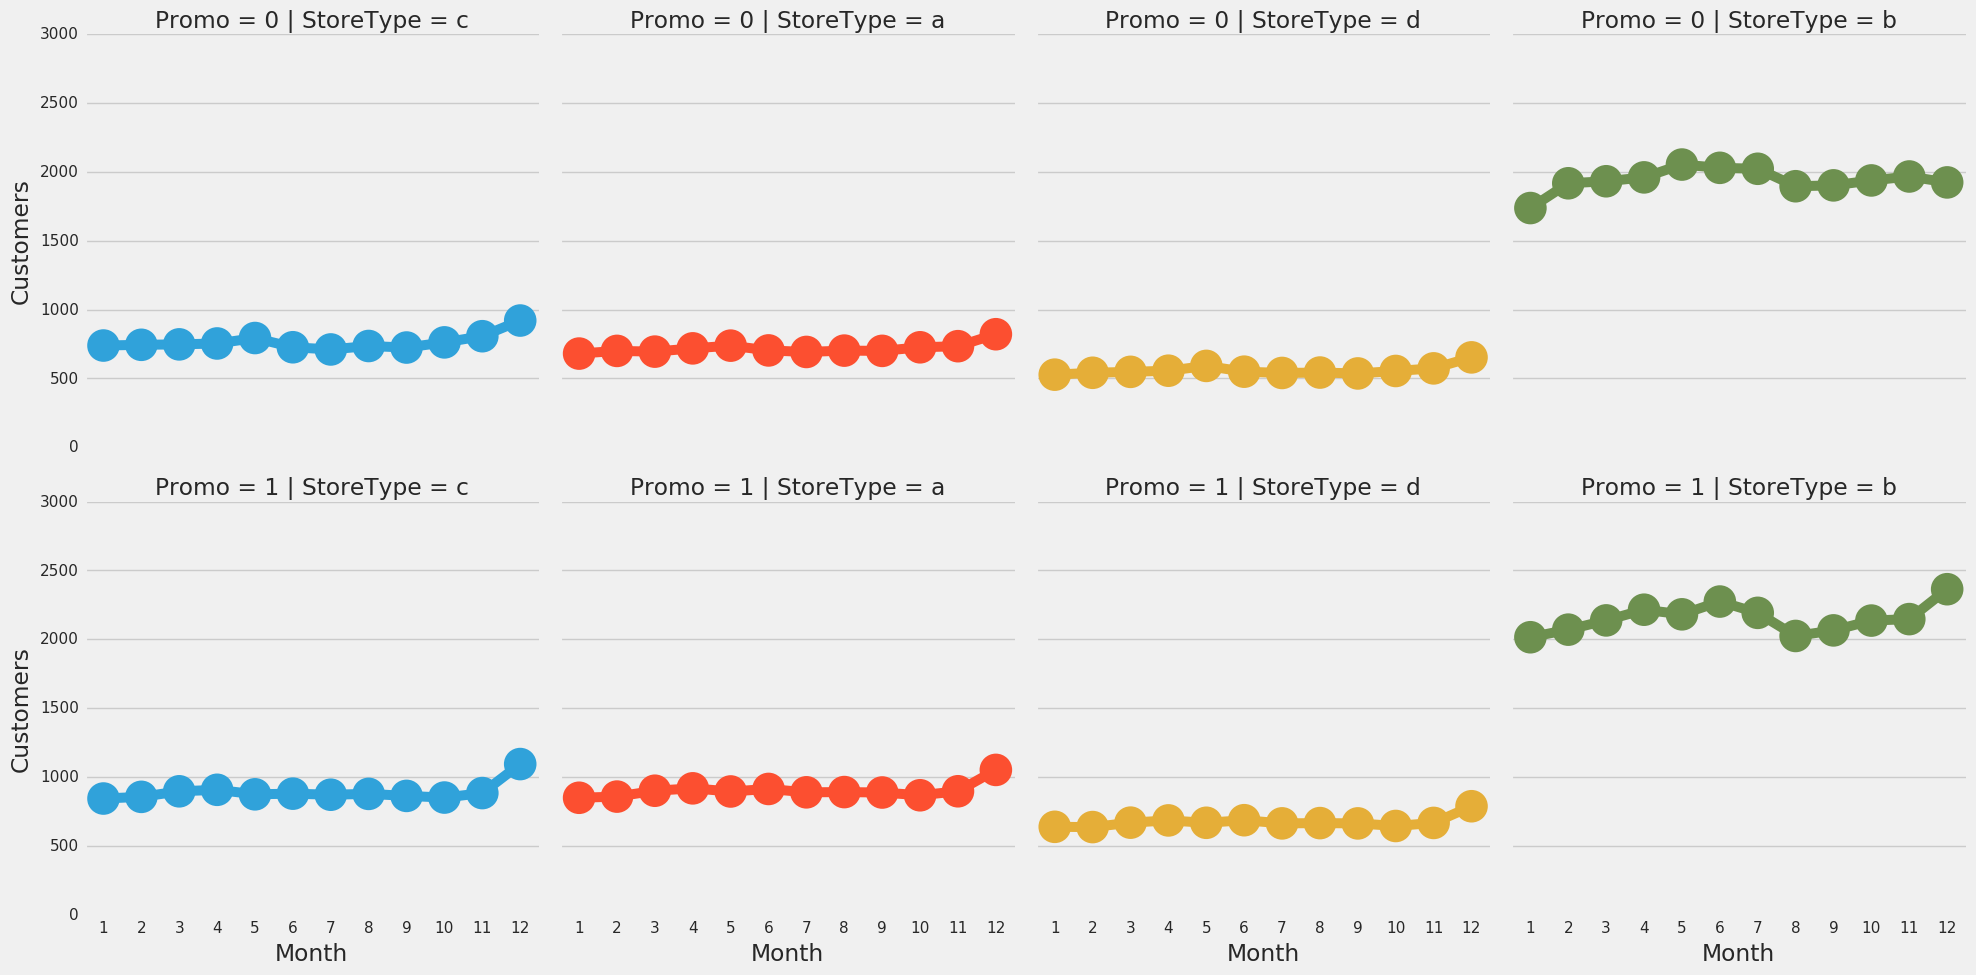

In [57]:
sns.catplot(data = df, x = 'Month', y = "Customers", 
               col = 'StoreType', # per store type in cols
               hue = 'StoreType',
               row = 'Promo',
               kind="point")